In [1]:
import rosbag2_py
from sensor_msgs.msg import JointState
from rclpy.serialization import deserialize_message


def read_joint_states_from_rosbag(bag_path):
    joint0_positions = []
    joint0_velocities = []
    joint1_positions = []
    joint1_velocities = []
    storage_options = rosbag2_py._storage.StorageOptions(uri=bag_path)
    converter_options = rosbag2_py._storage.ConverterOptions("", "")
    reader = rosbag2_py.SequentialReader()
    reader.open(storage_options, converter_options)

    while reader.has_next():
        topic, data, timestamp = reader.read_next()
        if topic == "joint_states":
            msg = deserialize_message(data, JointState)
            joint0_positions.append(msg.position[0])
            joint0_velocities.append(msg.velocity[0])
            joint1_positions.append(msg.position[1])
            joint1_velocities.append(msg.velocity[1])

    return joint0_positions, joint0_velocities, joint1_positions, joint1_velocities


In [2]:
import matplotlib.pyplot as plt


def plot_compare(gazebo, de, title):
    plt.figure(figsize=(10, 6))
    plt.plot(gazebo)
    plt.plot(de)
    plt.legend(["Gazebo", "DE"])
    plt.title(title)
    plt.grid(True)
    plt.show()


[INFO] [1692106141.986296297] [rosbag2_storage]: Opened database 'data/impulse_response_gazebo/impulse_response_gazebo_0.db3' for READ_ONLY.
[INFO] [1692106142.604232727] [rosbag2_storage]: Opened database 'data/impulse_response_de/impulse_response_de_0.db3' for READ_ONLY.


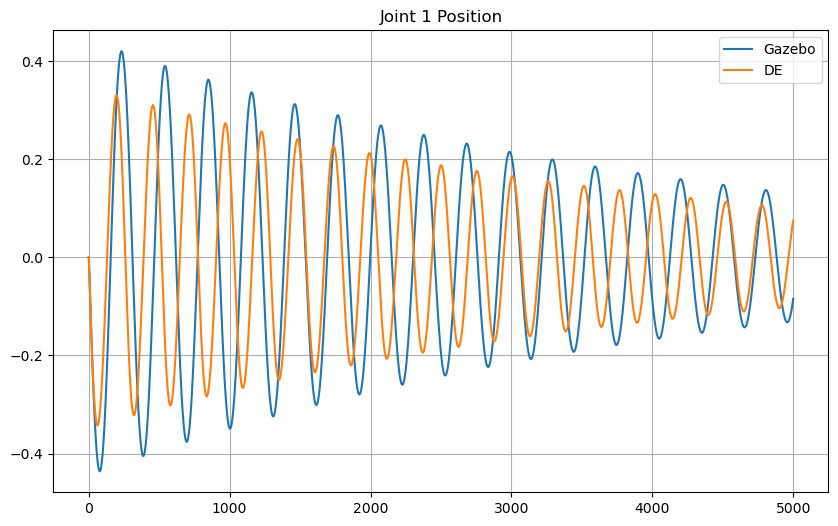

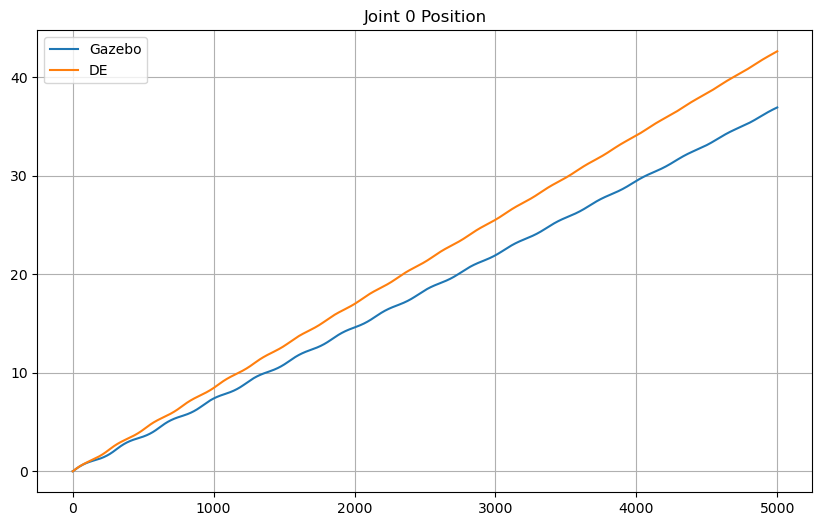

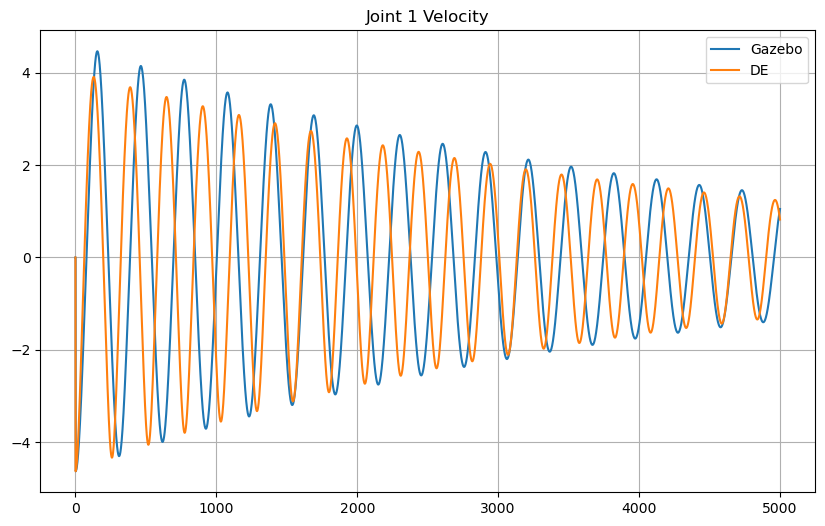

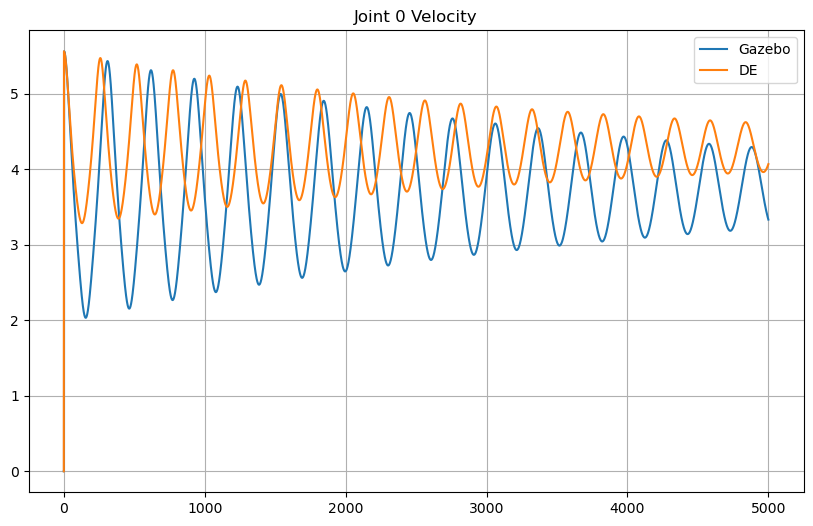

In [3]:
(
    joint0_positions_gazebo,
    joint0_velocities_gazebo,
    joint1_positions_gazebo,
    joint1_velocities_gazebo,
) = read_joint_states_from_rosbag("data/impulse_response_gazebo")
(
    joint0_positions_de,
    joint0_velocities_de,
    joint1_positions_de,
    joint1_velocities_de,
) = read_joint_states_from_rosbag("data/impulse_response_de")

plot_compare(joint1_positions_gazebo, joint1_positions_de, "Joint 1 Position")
plot_compare(joint0_positions_gazebo, joint0_positions_de, "Joint 0 Position")

plot_compare(joint1_velocities_gazebo, joint1_velocities_de, "Joint 1 Velocity")
plot_compare(joint0_velocities_gazebo, joint0_velocities_de, "Joint 0 Velocity")


[INFO] [1692106143.672174593] [rosbag2_storage]: Opened database 'data/step_response_gazebo/step_response_gazebo_0.db3' for READ_ONLY.
[INFO] [1692106144.020218839] [rosbag2_storage]: Opened database 'data/step_response_de/step_response_de_0.db3' for READ_ONLY.


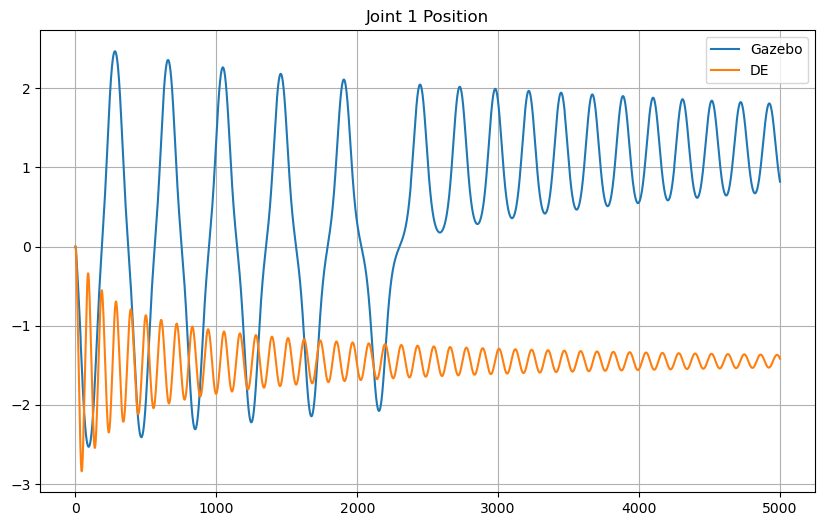

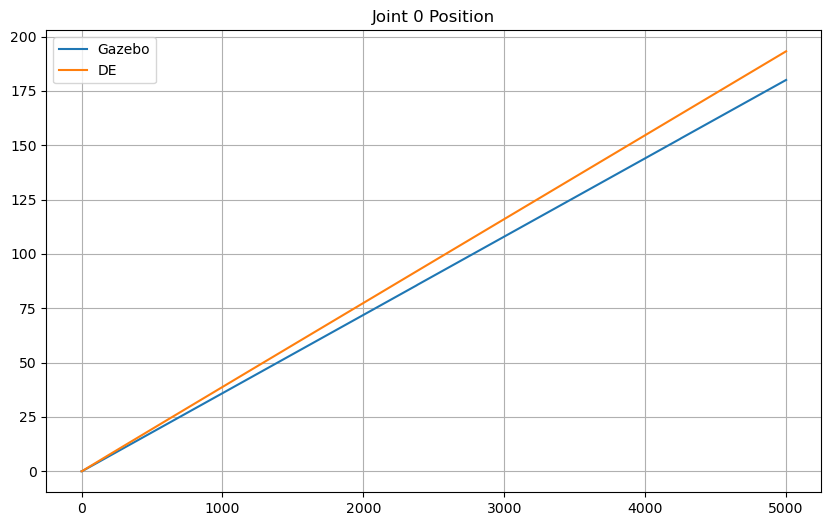

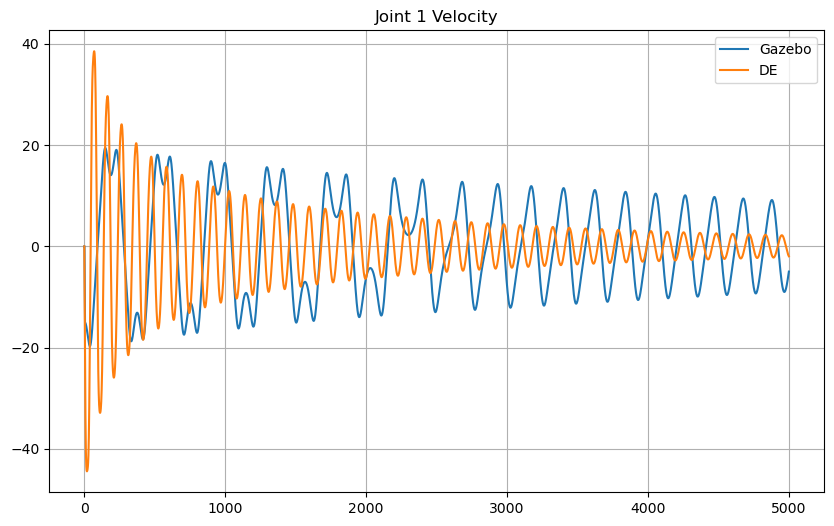

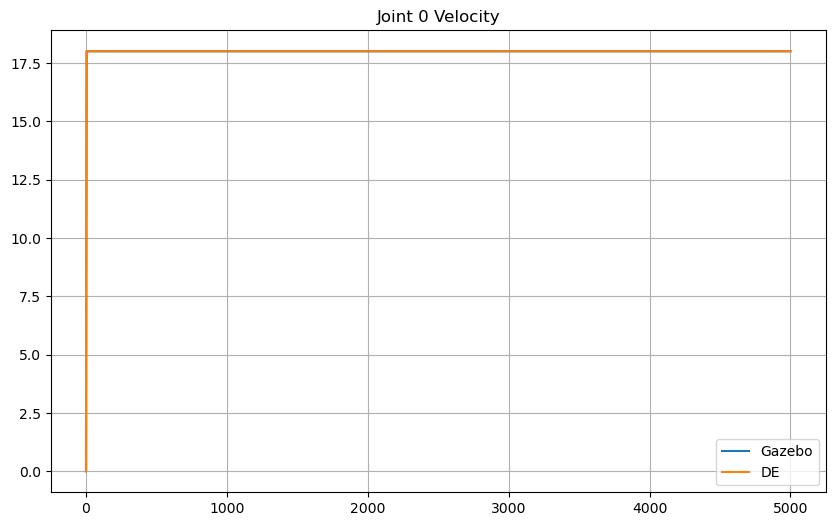

In [4]:
(
    joint0_positions_gazebo,
    joint0_velocities_gazebo,
    joint1_positions_gazebo,
    joint1_velocities_gazebo,
) = read_joint_states_from_rosbag("data/step_response_gazebo")
(
    joint0_positions_de,
    joint0_velocities_de,
    joint1_positions_de,
    joint1_velocities_de,
) = read_joint_states_from_rosbag("data/step_response_de")

plot_compare(joint1_positions_gazebo, joint1_positions_de, "Joint 1 Position")
plot_compare(joint0_positions_gazebo, joint0_positions_de, "Joint 0 Position")

plot_compare(joint1_velocities_gazebo, joint1_velocities_de, "Joint 1 Velocity")
plot_compare(joint0_velocities_gazebo, joint0_velocities_de, "Joint 0 Velocity")
